# Cu-B
Jan 2023

In [1]:
import sys
import os
import json
#sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/TrON'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots

In [2]:
project_dir = os.path.expanduser('~/git/nh3-analysis/jan2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6')

#dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))
#dyn_model_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')
dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'data', 'results', 'refl1d_output'))

#results_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting', 'results'))


# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-29196/shared/autoreduce/'

# Directory with fit results
#fit_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')
fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'

dynamic_run = 201289 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/30s'
#dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201289-dyn/results-30s-bck'

# dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
# dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201289-dyn/results-15s-bck'

delta_t = 30
model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')


dyn_fit_dir = os.path.join(dyn_model_dir, '%s-dyn/results-30s-bck' % dynamic_run)

## Summary of 60 Hz data

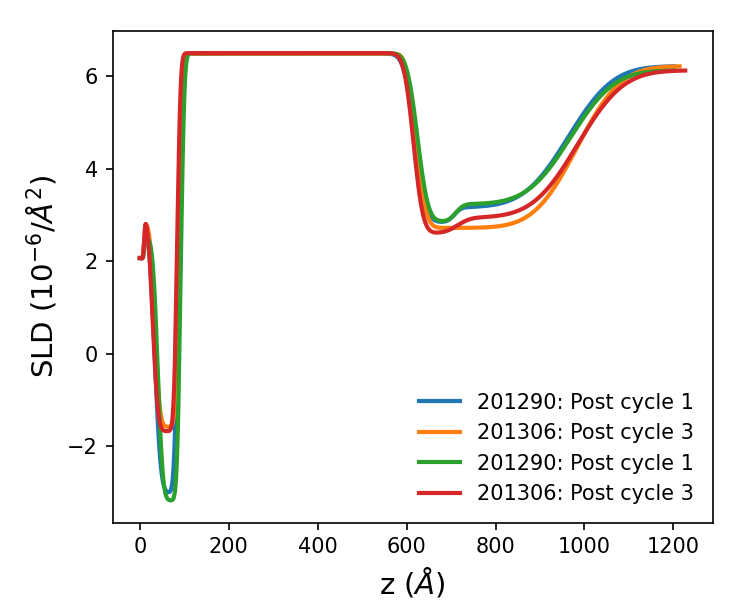

In [4]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

_dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))
model_201282 = os.path.join(_dyn_model_dir, "201282", "__model-profile.dat")
model_201290 = os.path.join(_dyn_model_dir, "201290", "__model-profile.dat")
model_201298 = os.path.join(_dyn_model_dir, "201298", "__model-profile.dat")
model_201306 = os.path.join(_dyn_model_dir, "201306", "__model-profile.dat")
model_201334 = os.path.join(_dyn_model_dir, "201334", "__model-profile.dat")

#summary_plots.plot_sld(model_201282, "201282: Pre cycle 1", show_cl=False)
summary_plots.plot_sld(model_201290, "201290: Post cycle 1", show_cl=False)
#summary_plots.plot_sld(model_201298, "201298: Post cycle 2", show_cl=False)
summary_plots.plot_sld(model_201306, "201306: Post cycle 3", show_cl=False)
#summary_plots.plot_sld(model_201334, "201334: Post cycle 4", show_cl=False)

#plt.legend(loc='lower right', frameon=False, fontsize=10)
#plt.xlabel('z ($\AA$)', fontsize=14)
#plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
#plt.show()


#fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
#plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

model_201282 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201282-profile.dat")
model_201290 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201290-abs-profile.dat")
model_201298 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201298-abs-profile.dat")
model_201306 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201306-abs-profile.dat")
model_201334 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201334-abs-profile.dat")

#summary_plots.plot_sld(model_201282, "201282: Pre cycle 1", show_cl=False)
summary_plots.plot_sld(model_201290, "201290: Post cycle 1", show_cl=False)
#summary_plots.plot_sld(model_201298, "201298: Post cycle 2", show_cl=False)
summary_plots.plot_sld(model_201306, "201306: Post cycle 3", show_cl=False)
#summary_plots.plot_sld(model_201334, "201334: Post cycle 4", show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/30s
289


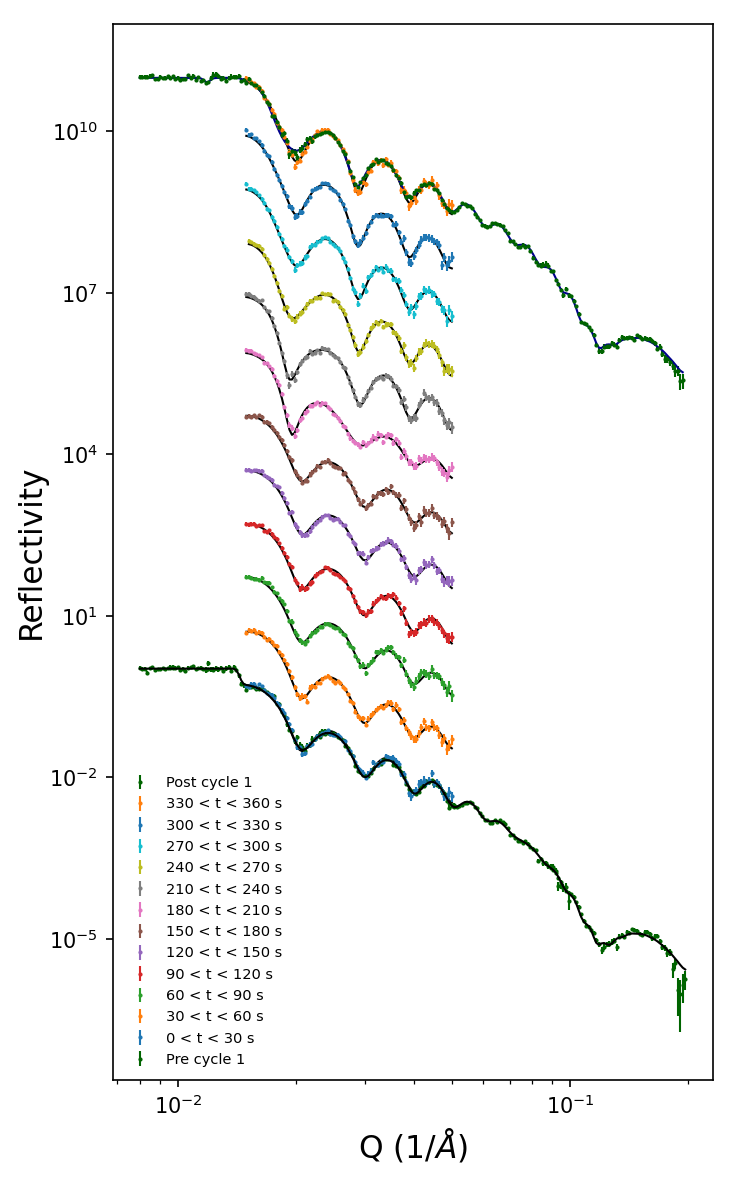

In [5]:
importlib.reload(summary_plots)
print(dyn_data_dir)

# Short timeframe for paper
last_index = 12

refl_201282 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201282-refl.dat")
refl_201290 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201290-abs-refl.dat")

file_list = summary_plots.plot_dyn_data(dynamic_run, refl_201282, refl_201290, first_index=0, last_index=12, model_name='model-loop-201289',
                                        dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

plt.savefig('Cu-B-dyn-Rq.png')

#file_list = summary_plots.plot_dyn_data(dynamic_run, 201282, 201290, first_index=0, last_index=last_index, delta_t=delta_t, model_name='model-loop-201289',
#                            fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

## CP 1: Change as a function of time

/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/30s
289
Ref r201289_t000000.txt
Skipped: 0


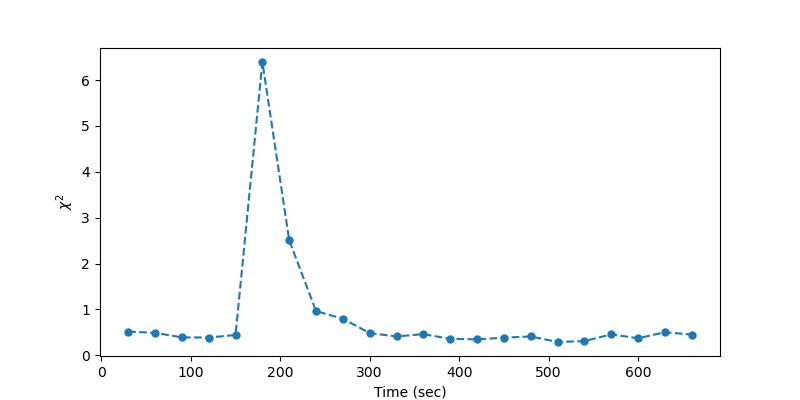

In [17]:
importlib.reload(summary_plots)
print(dyn_data_dir)
t, chi2 = summary_plots.detect_changes(201289, dyn_data_dir, first=0, last=23, out_array='/SNS/users/m2d/trend-201289')

## CP 2: Change as a function of time

/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/30s
157
Ref r201297_t000000.txt
Skipped: 0


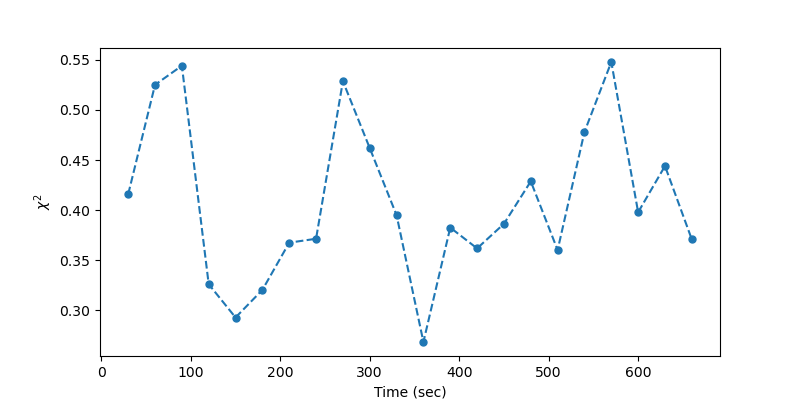

In [7]:
importlib.reload(summary_plots)
print(dyn_data_dir)
t_2, chi2_2 = summary_plots.detect_changes(201297, dyn_data_dir, first=0, last=23, out_array=None)

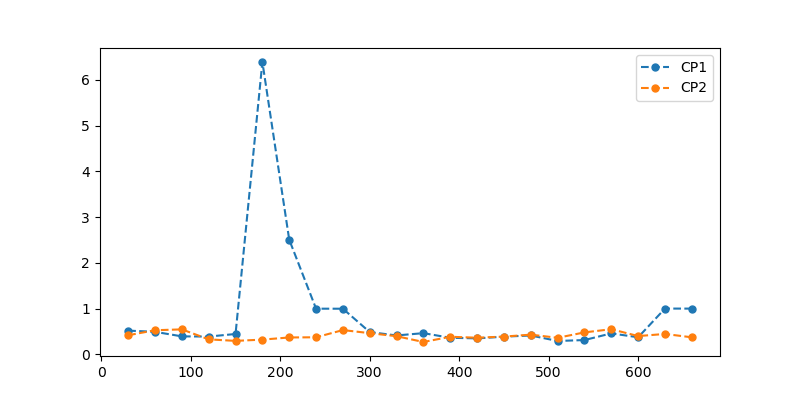

In [14]:
fig = plt.figure(dpi=100, figsize=[8,4])
plt.plot(t, chi2, markersize=10, marker='.', linestyle='--', label='CP1')
plt.plot(t_2, chi2_2, markersize=10, marker='.', linestyle='--', label='CP2')
plt.legend()

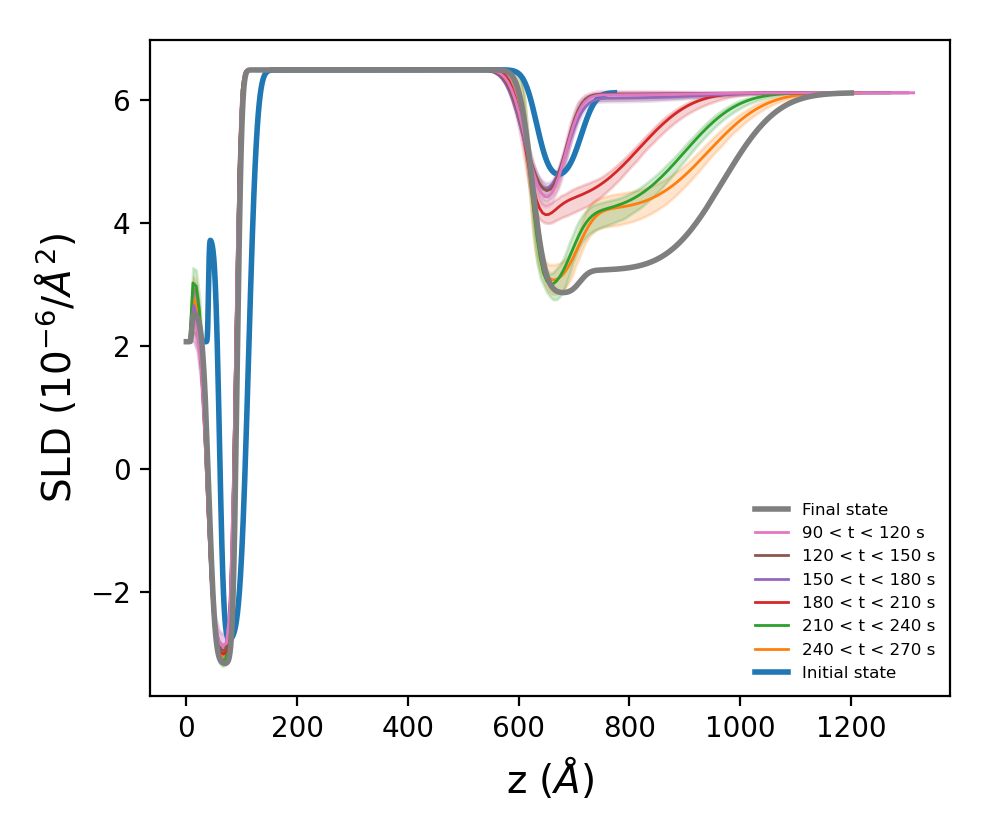

In [7]:
importlib.reload(summary_plots)

_dynamic_run = 201289 # Cycle 1

#dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
#dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results'
_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'
#model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

# List of time-resolved data to plot
_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

sld_201282 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201282-profile.dat")
sld_201290 = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_201290-abs-profile.dat")

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-201289.py')

summary_plots.plot_dyn_sld(_file_list, sld_201282, sld_201290, 
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=True, model_name='model-loop-201289')
plt.savefig('Cu-B.svg')
plt.savefig('Cu-B.png')


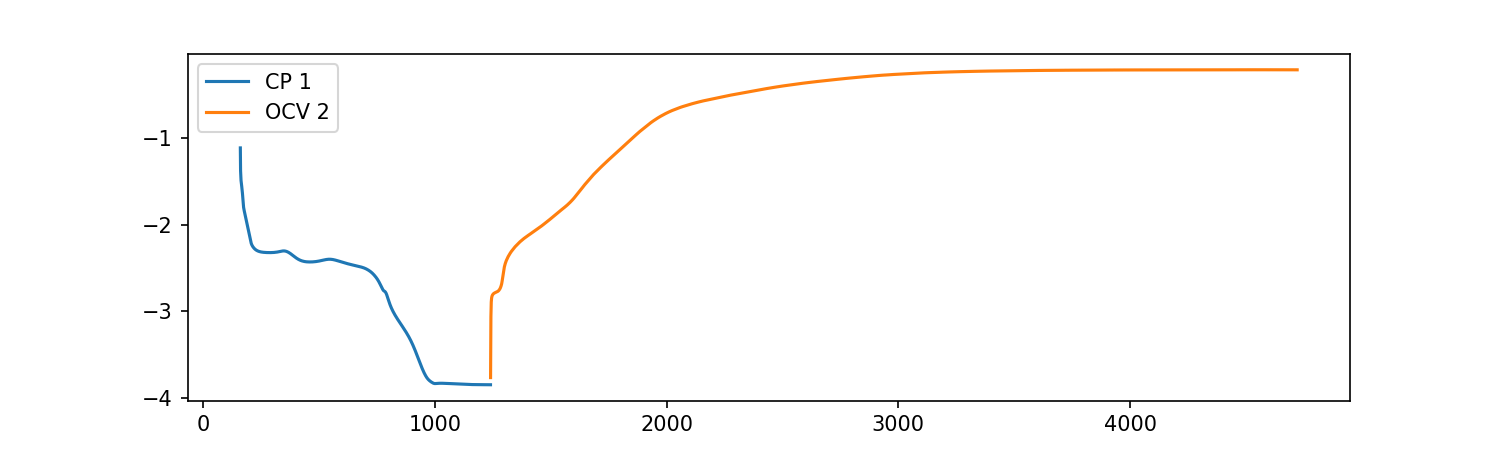

In [17]:
fig, ax = plt.subplots(dpi=150, figsize=(10, 3))

ec_cp1 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_CP1.txt'), delimiter=',', skiprows=1).T
plt.plot(ec_cp1[0], ec_cp1[1], label='CP 1')

#ec_cp2 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_CP2.txt'), delimiter=',', skiprows=1).T
#plt.plot(ec_cp2[0], ec_cp2[1], label='CP 2')
         
ec_ocv2 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_OCV2.txt'), delimiter=',', skiprows=1).T
plt.plot(ec_ocv2[0], ec_ocv2[1], label='OCV 2')
         
#ec_ocv3 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_OCV3.txt'), delimiter=',', skiprows=1).T
#plt.plot(ec_ocv3[0], ec_ocv3[1], label='OCV 3')
plt.legend()

THF interface 31.579344353462634
material interface 18.8105316455534
material rho 4.412367650730241
material thickness 67.93411163303381
Cu thickness 523.5305237821512
Ti rho -2.4438556505039144
Output saved to /SNS/users/m2d/git/nh3-analysis/jan2023/data/results/refl1d_output/201289-dyn/results-30s-bck/trend-model-loop-201289.json


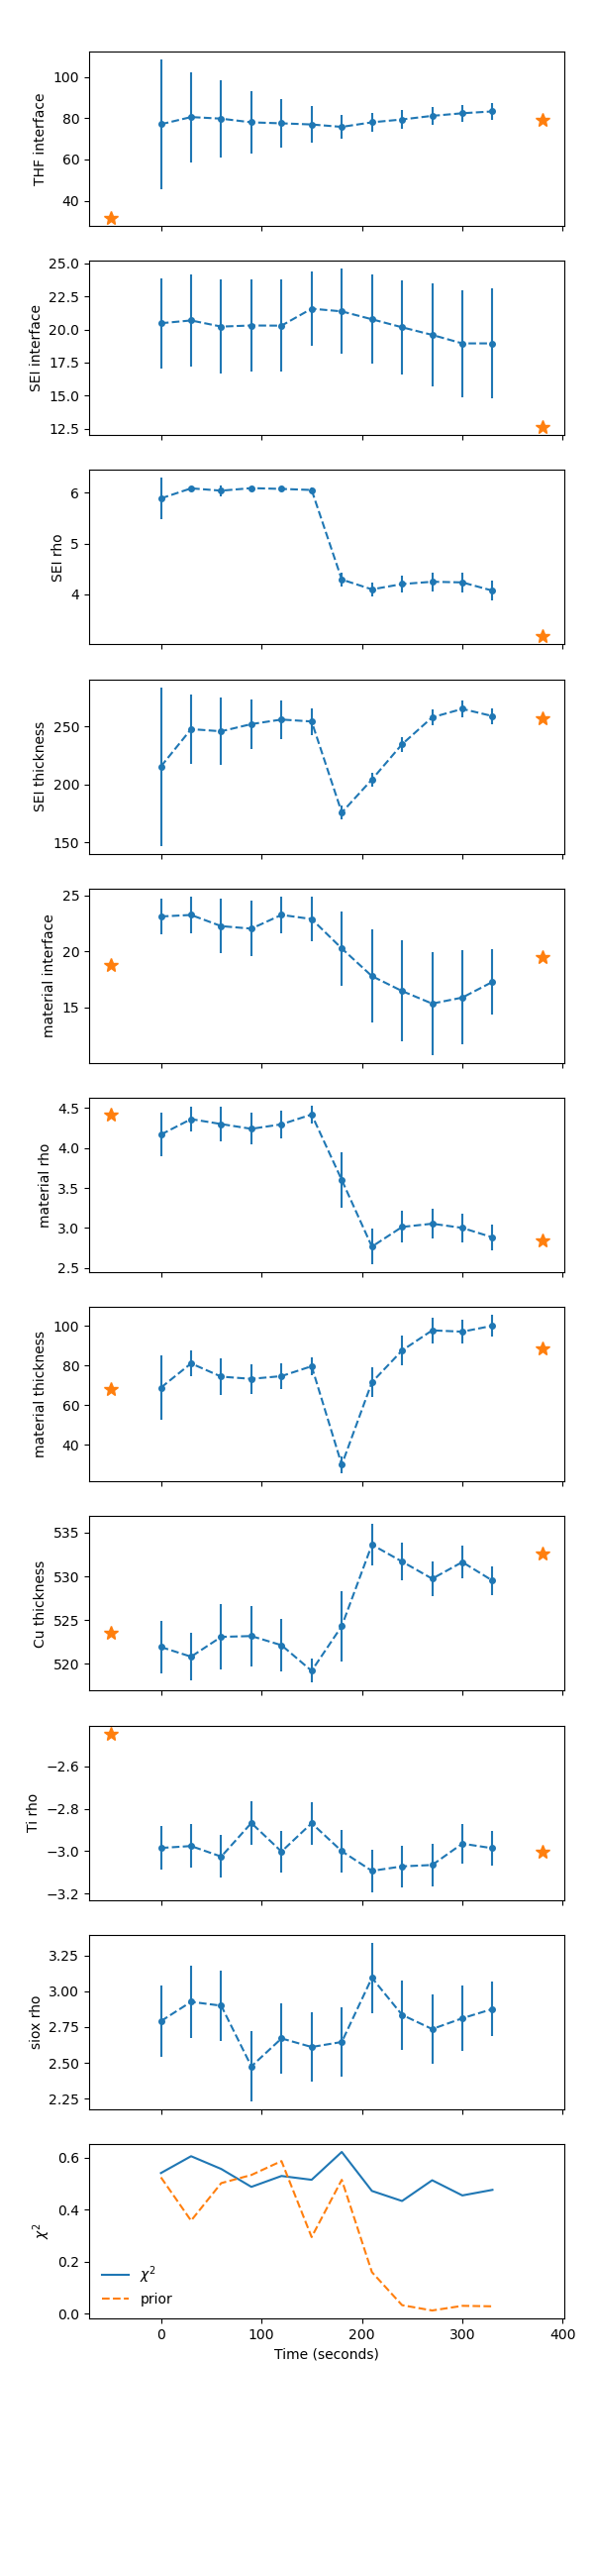

In [66]:
importlib.reload(summary_plots)

trend_data, trend_err = summary_plots.trend_data(file_list, 201282, 201290, 
                                  fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                  model_name='model-loop-201289', model_file=model_file, add_plot=0)
summary_plots.write_md_table('/SNS/users/m2d/git/nh3-analysis/jan2023/data/results/refl1d_output/201289-dyn/results-30s-bck/trend-model-loop-201289.json')


dict_keys(['THF interface', 'SEI interface', 'SEI rho', 'SEI thickness', 'material interface', 'material rho', 'material thickness', 'Cu thickness', 'Ti rho'])
[198.83038785717227, 224.8185060939146, 246.58198388335558, 252.35061672333597, 255.53930955356915, 254.34344592340068, 175.35483823737005, 204.2256795065684, 234.43034754188673, 257.3334392659734, 264.88493638430754, 259.08705988906127]


NameError: name 'timestamps' is not defined

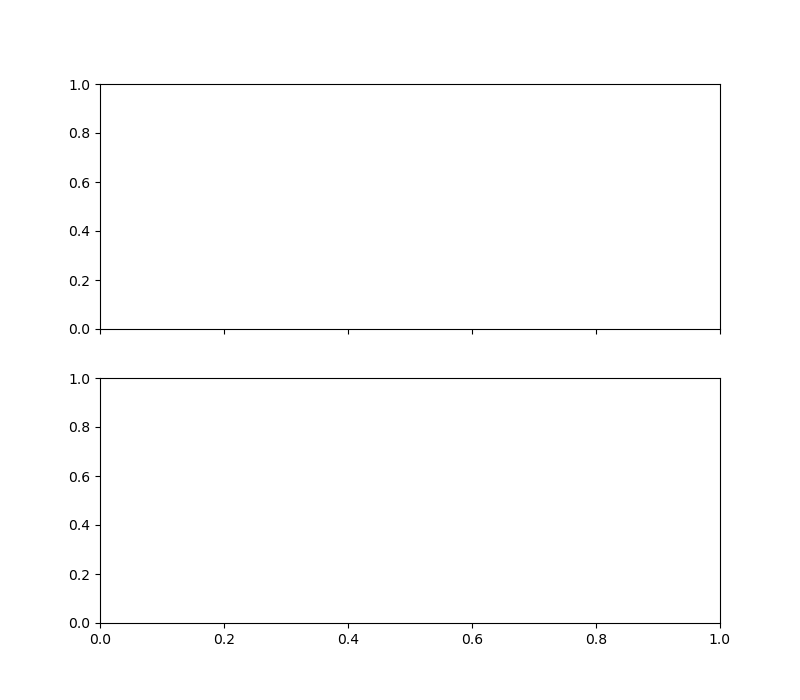

In [41]:
print(trend_data.keys())
print(trend_data['SEI thickness'])

material_rho = [4.412367650730241, 2.8428823396604295]
material_thickness = [67.93411163303381, 88.61444478075911]
sei_rho = [3.1663448398018947]
sei_thickness = [256.5591921748873]


i_start = 6

fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8,7), sharex=True)
plt.subplot(2, 1, 1)
plt.errorbar(timestamps, trend_data['SEI rho'], yerr=trend_err['SEI rho'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material rho'], yerr=trend_err['material rho'], alpha=0.2, color='orange')

plt.errorbar(timestamps[i_start:], trend_data['SEI rho'][i_start:], yerr=trend_err['SEI rho'][i_start:], label='SEI', color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material rho'][i_start:], yerr=trend_err['material rho'][i_start:], label='Plated layer', color='orange')

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_rho, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_rho, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

#plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.legend(frameon=False)



plt.subplot(2, 1, 2)
plt.errorbar(timestamps, trend_data['SEI thickness'], yerr=trend_err['SEI thickness'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material thickness'], yerr=trend_err['material thickness'], alpha=0.2, color='orange')
plt.errorbar(timestamps[i_start:], trend_data['SEI thickness'][i_start:], yerr=trend_err['SEI thickness'][i_start:], color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material thickness'][i_start:], yerr=trend_err['material thickness'][i_start:], color='orange')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Thickness ($\AA$)', fontsize=14)

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_thickness, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_thickness, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')


In [159]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-201289.json')
print(trend_file)
summary_plots.write_md_table(trend_file)

/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201289-dyn/results-30s-bck-long/trend-model-loop-201289.json


# 5-second data

## Trend data

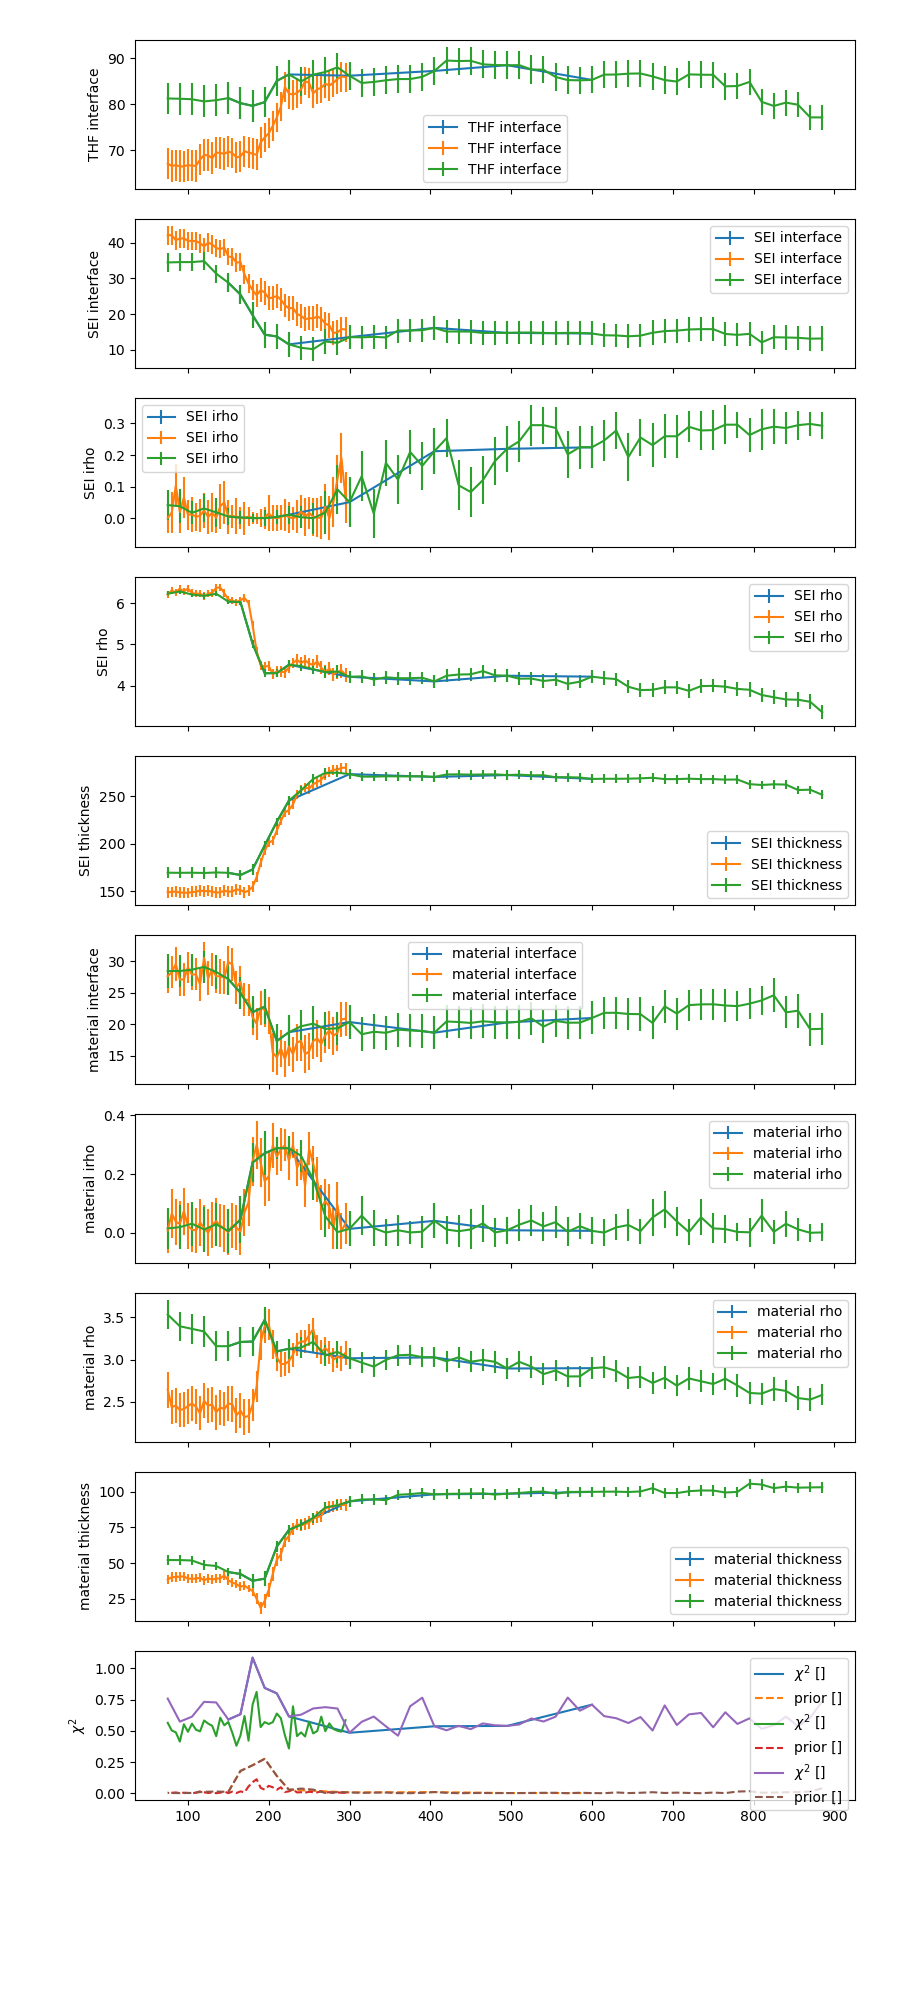

In [31]:
importlib.reload(summary_plots)

if True:
    summary_plots.trend_data(file_list[:-1], None, 201290, 
                             fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                             model_name='model-loop-v2', model_file=model_file)


if True:
    dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/5s'
    dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-5s'

    #dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
    #dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-15s'

    first = 15
    last = 60

    _file_list = sorted(os.listdir(dyn_data_dir))

    # Get only the files for the run we're interested in
    _good_files = []
    for _f in _file_list:
        if _f.startswith('r%d_t' % dynamic_run):
            a, _ = os.path.splitext(_f)
            t = int(a[-6:])
            _good_files.append([t, a, a])

    _good_files = _good_files[first:last]
    _good_files.reverse()

    model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

    summary_plots.trend_data(_good_files, None, 201290, 
                             fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                             model_name='model-loop-v2', model_file=model_file, newplot=False)

#dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/5s'
#dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-5s-prior_1_0'
#summary_plots.trend_data(_good_files, None, 201290, 
#                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
#                         model_name='model-loop-v2', model_file=model_file, newplot=False)



dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results-15s'
#fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'
#model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

first = 0
last = 60

_file_list = sorted(os.listdir(dyn_data_dir))

# Get only the files for the run we're interested in
_good_files = []
for _f in _file_list:
    if _f.startswith('r%d_t' % dynamic_run):
        a, _ = os.path.splitext(_f)
        t = int(a[-6:])
        _good_files.append([t, a, a])

_good_files = _good_files[first:last]
_good_files.reverse()


summary_plots.trend_data(_good_files, None, 201290, 
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-v2', model_file=model_file, newplot=False)


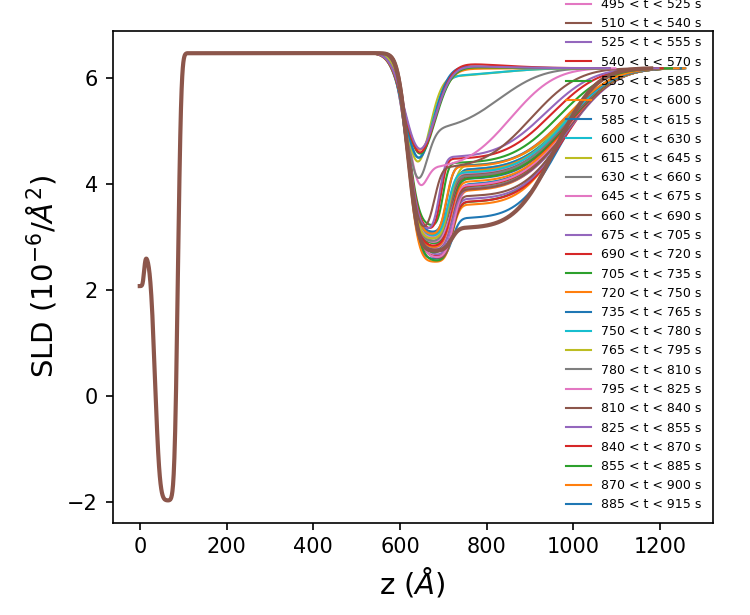

In [14]:
importlib.reload(summary_plots)

summary_plots.plot_dyn_sld(_good_files, None, 201290, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                           model_name='model-loop-v2', model_file=model_file, show_cl=False)